<a href="https://colab.research.google.com/github/Fluffy96/AdverserialAttack/blob/main/CNNDogCatUsingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import keras
import matplotlib.pyplot as plt


In [2]:
X_train = np.loadtxt('/content/drive/MyDrive/DL/CNN/Cat&Dog Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/DL/CNN/Cat&Dog Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/DL/CNN/Cat&Dog Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/DL/CNN/Cat&Dog Dataset/labels_test.csv', delimiter = ',')


# Preprocessing

- Change image to size 100 by 100<br>
- Normalize rgb values to be from 0 to 1 (remebr to divide by 255.0 so that variable is kept as a double)


In [3]:
X_train = X_train.reshape(len(X_train), 100,100,3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100,100,3)
Y_test = Y_test.reshape(len(Y_test), 1)
X_train = X_train/255.0
X_test = X_test/255.0

# Model
- Use Sequential to create a workflow for layer order

In [4]:
model = Sequential([
    Conv2D(10,(3,3),activation = 'relu', input_shape = (100,100,3) ) ,
    #32 = 32 filters  3,3 = height and width of filter   Activation function   Input shape= 100 by 100 wiht 3 channels
    MaxPooling2D((2,2)),
    #2,2 = filter size
    Conv2D(10,(3,3),activation ='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(500, activation ='relu'),
    Dense( 100, activation ='relu'),
    Dense( 40, activation ='relu'),
    # Fully connected layer with 64 neurons using activation function Relu
    Dense(1,activation ='sigmoid')
])
#opt = keras.optimizers.SGD(learning_rate = .001)
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'])

In [5]:
model.fit(X_train,Y_train,epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 15s 415ms/step - loss: 0.6877 - accuracy: 0.5420
Epoch 2/5
32/32 [==============================] - 13s 420ms/step - loss: 0.6669 - accuracy: 0.5845
Epoch 3/5
32/32 [==============================] - 13s 416ms/step - loss: 0.5961 - accuracy: 0.6935
Epoch 4/5
32/32 [==============================] - 17s 520ms/step - loss: 0.5344 - accuracy: 0.7335
Epoch 5/5
32/32 [==============================] - 13s 415ms/step - loss: 0.4428 - accuracy: 0.7925


In [6]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 80ms/step - loss: 0.6942 - accuracy: 0.6500


[0.6942468881607056, 0.6499999761581421]

In [7]:

waldo = load_img('/content/drive/MyDrive/DL/CNN/Cat&Dog Dataset/garfield.jpg')
target_size = (100, 100)
waldo = waldo.resize(target_size)
waldo = img_to_array(waldo)
waldo = waldo / 255.0
waldo = np.expand_dims(waldo, axis=0)


1/1 [==============================] - 0s 128ms/step
cat with confidence [[0.6032319]]


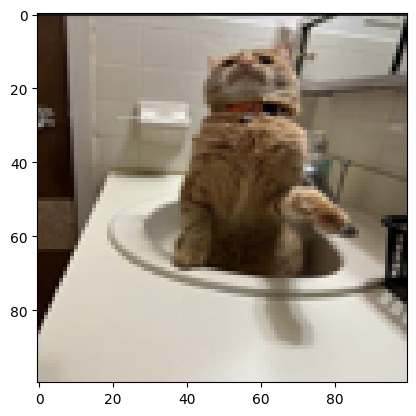

In [8]:
plt.imshow(waldo[0,:])
plt.show
pred = model.predict(waldo)
if pred > .5:
  print("cat with confidence "+str(pred))
else:
    print("dog")